In [1]:
import os
import pandas as pd
import numpy as np

from src.components import data_ingestion
from src.components import data_transformation

from sklearn.cluster import AgglomerativeClustering

In [2]:
ingestion_obj = data_ingestion.DataIngestion()
raw_data_path = ingestion_obj.initiate_data_ingestion()

In [3]:
data_transformation = data_ingestion.DataTransformation()
transformed_data = data_transformation.initiate_data_transformation(raw_data_path)

In [4]:
stdv_vec = transformed_data.stdv
avg_vec = transformed_data.avg

transformed_data['IsGrey'] = np.where(stdv_vec<=14,1,0)*np.where(np.logical_and(avg_vec>= 85, avg_vec <= 190),1,0)

In [5]:
data_to_cluster = transformed_data.query('IsGrey==1')

In [6]:
data_to_cluster

X    Y      R      G      B  Grey       stdv         avg  IsGrey
27709   662   36   74.0   99.0   96.0     0  13.650397   89.666667       1
28458   656   37   73.0   94.0   99.0     0  13.796135   88.666667       1
28459   657   37   74.0   93.0   99.0     0  13.051181   88.666667       1
28460   658   37   72.0   91.0   97.0     0  13.051181   86.666667       1
28461   659   37   71.0   90.0   94.0     0  12.288206   85.000000       1
...     ...  ...    ...    ...    ...   ...        ...         ...     ...
699482   79  754  151.0  178.0  163.0     0  13.527749  164.000000       1
699906  503  754  165.0  189.0  175.0     0  12.055428  176.333333       1
699907  504  754  147.0  174.0  157.0     0  13.650397  159.333333       1
700871  503  755  174.0  201.0  186.0     0  13.527749  187.000000       1
700872  504  755  160.0  187.0  172.0     0  13.527749  173.000000       1

[71460 rows x 9 columns]

In [7]:
data_to_cluster.shape

(71460, 9)

In [79]:
model = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=12,
    linkage = "single"
)

In [80]:
model.fit(data_to_cluster[['X','Y']])

AgglomerativeClustering(distance_threshold=12, linkage='single',
                        n_clusters=None)

In [81]:
model.n_clusters_

178

In [82]:
cluster_groups = model.fit_predict(data_to_cluster[['X','Y']])

In [66]:
data_to_cluster.shape

(71460, 10)

In [67]:
cluster_groups.shape

(71460,)

In [68]:
data_to_cluster['cluster_groups'] = cluster_groups

C:\Users\mamah\AppData\Local\Temp\ipykernel_20776\2796601660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
data_to_cluster.cluster_groups.value_counts()

cluster_groups
41     1897
42     1734
16     1730
132     979
149     862
       ... 
164       2
95        1
103       1
130       1
175       1
Name: count, Length: 178, dtype: int64

In [70]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(10,8)})

In [71]:
import matplotlib.pyplot as plt
from plotly import express as px

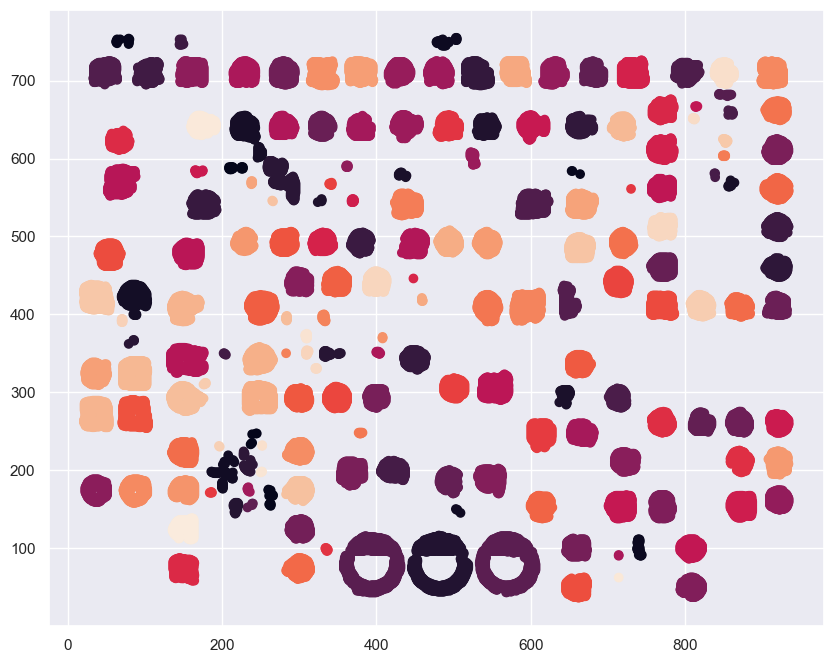

In [72]:
X = data_to_cluster['X'].values
Y = data_to_cluster['Y'].values
colours = data_to_cluster.cluster_groups.values

plt.scatter(x=X,y=Y,c=colours)
plt.show()

In [73]:
fig = px.scatter(
    data_frame=data_to_cluster,
    x='X',
    y='Y',
    color='cluster_groups'
)

fig.show()

In [74]:
clust_pixel_number = data_to_cluster.cluster_groups.value_counts()

In [75]:
cluster_pixel_number_df = pd.DataFrame({'cluster_groups':clust_pixel_number.index, 'number_pixel':clust_pixel_number.values})
data_with_cluster_and_count = data_to_cluster.merge(cluster_pixel_number_df, how='left', on=['cluster_groups'])

In [76]:
fig = px.scatter(
    data_with_cluster_and_count.query('number_pixel>=360'),
    x='X',
    y='Y',
    color='cluster_groups'
)

fig.show()

In [94]:
fig = px.scatter(
    data_with_cluster_and_count.query('number_pixel>=120'),
    x='X',
    y='Y',
    color='cluster_groups'
)

fig.show()

In [ ]:
#https://en.wikipedia.org/wiki/Ball_grid_array

In [93]:
fig = px.scatter(
    data_with_cluster_and_count.query('number_pixel>=360').groupby(by = 'cluster_groups',as_index=False)[['X','Y']].mean(),
    x='X',
    y='Y',
    color='cluster_groups'
)

fig.show()